In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os
import pickle
import random
import seaborn as sns
import torch

In [2]:
# avoid type-3 fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


ALPHA = 0.3
# COLORS = sns.color_palette('muted')
COLORS = cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


def decorate_axis(ax, wrect=10, hrect=10, labelsize='large', scale_ticks=True):
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    # Deal with ticks and the blank space at the origin
    if scale_ticks:
        ax.tick_params(length=0.1, width=0.1, labelsize=labelsize)
    else:
        ax.tick_params(labelsize=labelsize)
    # Pablos' comment
    ax.spines['left'].set_position(('outward', hrect))
    ax.spines['bottom'].set_position(('outward', wrect))


def annotate_and_decorate_axis(
    ax,
    xlabel,
    ylabel,
    ylabel_color=None,
    wrect=10,
    hrect=10,
    grid_alpha=1,
    labelsize='large',
    ticklabelsize='large',
    scale_ticks=True,
):
    ax.set_xlabel(xlabel, fontsize=labelsize)
    if ylabel_color is not None:
        ax.set_ylabel(ylabel, fontsize=labelsize, color=ylabel_color)
    else:
        ax.set_ylabel(ylabel, fontsize=labelsize)
    ax.grid(True, alpha=grid_alpha)
    decorate_axis(ax, wrect, hrect, ticklabelsize, scale_ticks)
    
def export_legend(lines, save_path):
    # Lines to show on legend and their labels
    labels = [i.get_label() for i in lines]
    legend_fig = plt.figure()
    legend_fig.legend(lines, labels, loc='center', ncol=len(lines))
    legend_fig.savefig(save_path, format='pdf', bbox_inches='tight')

In [3]:
def draw_mean(data, width=4, y_label='Mean Squared Error', show_y_label=True, save_figure=None, plot_legend=True, export_legend_path=None):
    fig = plt.figure()
    lines = []
    for alg_label, (x_values, y_values, color, style) in data.items():
        y_mean = y_values.mean(0)
        y_std = y_values.std(0)
        y_mean_std = y_std/(y_values.shape[0] ** 0.5)
        y_min = y_mean - y_mean_std * 1
        y_max = y_mean + y_mean_std * 1

        if alg_label is not None:
            lines.append(
                plt.plot(x_values, y_mean, label=alg_label, color=color, linewidth=width, linestyle=style)[0]
            )
        else:
            lines.append(
                plt.plot(x_values, y_mean, color=color, linewidth=width, linestyle=style)[0]
            )
            
        plt.fill_between(x_values, y_min, y_max, alpha=ALPHA, color=color)

    if not show_y_label:
        y_label = None
        
    annotate_and_decorate_axis(
        fig.axes[0], 'Timesteps', y_label, labelsize=25, ticklabelsize=20
    )
    plt.yscale('log')
    plt.xscale('log')
    
    if export_legend_path is not None:
        export_legend(lines, export_legend_path)
        # fig.axes[0].get_legend().remove()
        plt.figure(fig)
    elif plot_legend:
        plt.legend(fontsize=15)
    
    if save_figure is not None:
        plt.savefig(save_figure, format='pdf', bbox_inches='tight')

In [4]:
def draw_mean_kl(data, width=4, save_figure=None, plot_legend=True, export_legend_path=None, show_y_label=True):
    draw_mean(data, width, 'Sampling error', show_y_label, save_figure, plot_legend, export_legend_path)
    
    
def load_pickle_data(file):
    # print(f'loading {file} (last modified: {time.asctime(time.localtime(os.path.getmtime(file)))})')
    try:
        with open(file, 'rb') as f:
            return pickle.load(f)
    except Exception as e:
        print(f'load {file} error.')
        raise e

In [5]:
if not os.path.isdir('main_figures'):
    os.mkdirs('main_figures')

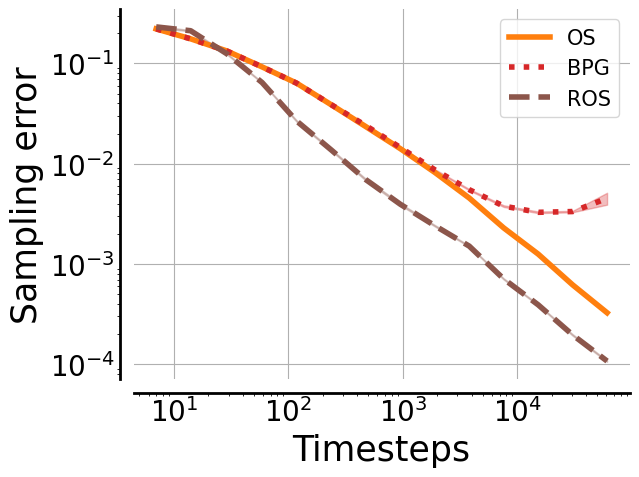

In [6]:
# Figure 1(a)
os_data = load_pickle_data('data/Gridworld/GridWorld_5000_OnPolicySampler1_WeightedRegressionImportanceSampling')
os_x = os_data['eval_steps']
os_kl = np.array(os_data['kl_divergence']['OnPolicySampler'])

bpg_data = load_pickle_data('data/Gridworld/GridWorld_5000_BehaviorPolicyGradient2_RegressionImportanceSampling')
bpg_x = bpg_data['eval_steps']
bpg_kl = np.array(bpg_data['kl_divergence']['BehaviorPolicyGradient'])

ros_data = load_pickle_data('data/Gridworld/GridWorld_5000_RobustOnPolicySampler3_RegressionImportanceSampling')
ros_x = ros_data['eval_steps']
ros_kl = np.array(ros_data['kl_divergence']['RobustOnPolicySampler'])

grid_5000_data_no_data = {
    'OS': (os_x, os_kl, COLORS[1], "-"),
    'BPG': (bpg_x, bpg_kl, COLORS[3], ":"),
    'ROS': (ros_x, ros_kl, COLORS[5], "--"),
}

draw_mean_kl(grid_5000_data_no_data, save_figure='main_figures/figure1a.pdf')

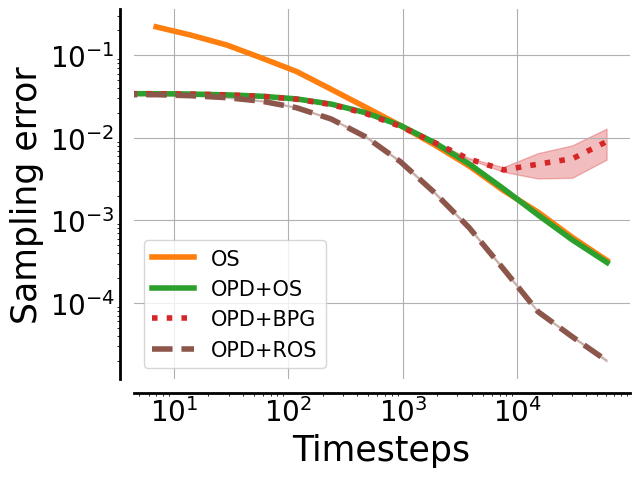

In [7]:
# Figure 1(b)
os_data = load_pickle_data('data/Gridworld/GridWorld_5000_OnPolicySampler1_WeightedRegressionImportanceSampling')
os_x = os_data['eval_steps']
os_kl = np.array(os_data['kl_divergence']['OnPolicySampler'])

opd_os_data = load_pickle_data('data/Gridworld/GridWorld_5000_OnPolicySamplerComb3_WeightedRegressionImportanceSampling')
opd_os_x = opd_os_data['eval_steps']
opd_os_kl = np.array(opd_os_data['kl_divergence']['OnPolicySampler'])

opd_bpg_data = load_pickle_data('data/Gridworld/GridWorld_5000_BehaviorPolicyGradientComb3_WeightedRegressionImportanceSampling')
opd_bpg_x = opd_bpg_data['eval_steps']
opd_bpg_kl = np.array(opd_bpg_data['kl_divergence']['BehaviorPolicyGradient'])

opd_ros_data = load_pickle_data('data/Gridworld/GridWorld_5000_RobustOnPolicySamplerComb3_WeightedRegressionImportanceSampling')
opd_ros_x = opd_ros_data['eval_steps']
opd_ros_kl = np.array(opd_ros_data['kl_divergence']['RobustOnPolicySampler'])

grid_5000_data_with_data = {
    'OS': (os_x, os_kl, COLORS[1], "-"),
    'OPD+OS': (opd_os_x, opd_os_kl, COLORS[2], "-"),
    'OPD+BPG': (opd_bpg_x, opd_bpg_kl, COLORS[3], ":"),
    'OPD+ROS': (opd_ros_x, opd_ros_kl, COLORS[5], "--"),
}

draw_mean_kl(grid_5000_data_with_data, save_figure='main_figures/figure1b.pdf')

<Figure size 640x480 with 0 Axes>

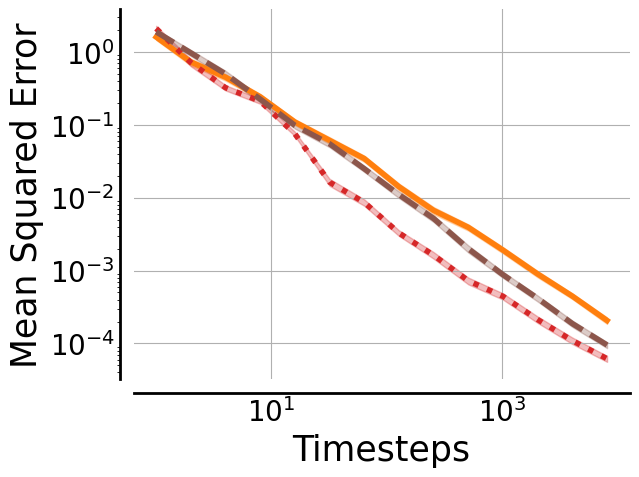

In [8]:
# Figure 2(a) 
fig_2a_data = torch.load('data/bandit/figure2a.pt')
x = fig_2a_data['xx']
os_values = fig_2a_data['values1']
bpg_values = fig_2a_data['values2']
ros_values = fig_2a_data['values3']

fig_2a_plot = {
    'OS-MC': (x, os_values, COLORS[1], '-'),
    'BPG-OIS': (x, bpg_values, COLORS[3], ':'),
    'ROS-MC': (x, ros_values, COLORS[5], '--'),
}

draw_mean(
    fig_2a_plot,
    save_figure='main_figures/figure2a.pdf',
    export_legend_path='main_figures/figure2_legend.pdf'
)

<Figure size 640x480 with 0 Axes>

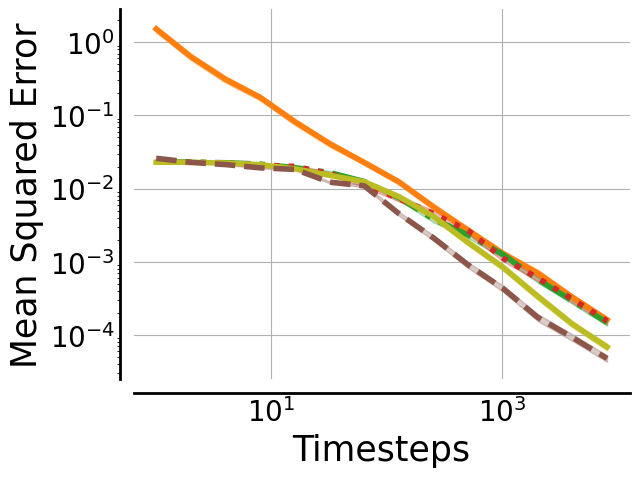

In [9]:
# Figure 3(a)
fig_3a_data = torch.load('data/bandit/figure3a.pt')
x = fig_3a_data['xx']
os_values = fig_3a_data['values1']
opd_os_values = fig_3a_data['values2']
opd_bpg_values = fig_3a_data['values3']
opd_wis_os_values = fig_3a_data['values4']
opd_ros_values = fig_3a_data['values5']

fig_3a_plot = {
    'OS-MC': (x, os_values, COLORS[1], '-'),
    '(OPD+OS)-MC': (x, opd_os_values, COLORS[2], '-.'),
    '(OPD+BPG)-OIS': (x, opd_bpg_values, COLORS[3], ':'),
    '(OPD+OS)-(WIS+MC)': (x, opd_wis_os_values, COLORS[8], '-'),
    '(OPD+ROS)-MC': (x, opd_ros_values, COLORS[5], '--'),
}

draw_mean(
    fig_3a_plot,
    save_figure='main_figures/figure3a.pdf',
    export_legend_path='main_figures/figure3_legend.pdf'
)

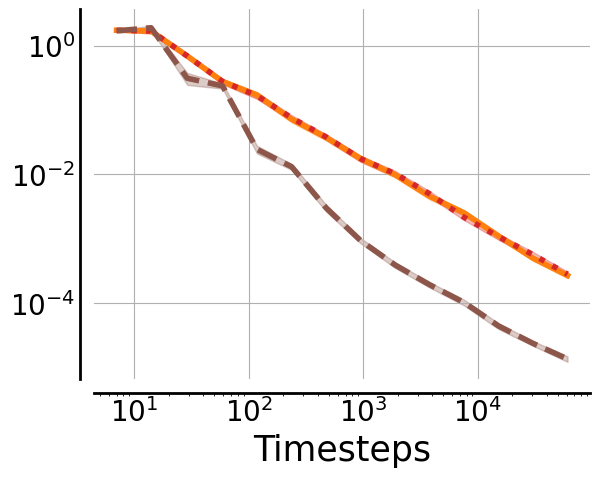

In [10]:
# Figure 2(b)
fig_2b_os_data = load_pickle_data('data/Gridworld/GridWorld_5000_OnPolicySampler1_MonteCarlo')
os_x = fig_2b_os_data['eval_steps']
values = np.array(fig_2b_os_data['estimations'][('OnPolicySampler','MonteCarlo')]) 
os_values = (values-1)**2

fig_2b_bpg_data = load_pickle_data('data/Gridworld/GridWorld_5000_BehaviorPolicyGradient2_OrdinaryImportanceSampling')
bpg_x = fig_2b_bpg_data['eval_steps']
values = np.array(fig_2b_bpg_data['estimations'][('BehaviorPolicyGradient', 'OrdinaryImportanceSampling')])
bpg_values = (values-1)**2

fig_2b_ros_data = load_pickle_data('data/Gridworld/GridWorld_5000_RobustOnPolicySampler3_MonteCarlo')
ros_x = fig_2b_ros_data['eval_steps']
values = np.array(fig_2b_ros_data['estimations'][('RobustOnPolicySampler', 'MonteCarlo')])
ros_values = (values-1)**2

fig_2b_plot = {
    'OS-MC': (os_x, os_values, COLORS[1], '-'),
    'BPG-OIS': (bpg_x, bpg_values, COLORS[3], ':'),
    'ROS-MC': (ros_x, ros_values, COLORS[5], '--'),
}
draw_mean(fig_2b_plot, save_figure='main_figures/figure2b.pdf', plot_legend=False, show_y_label=False)

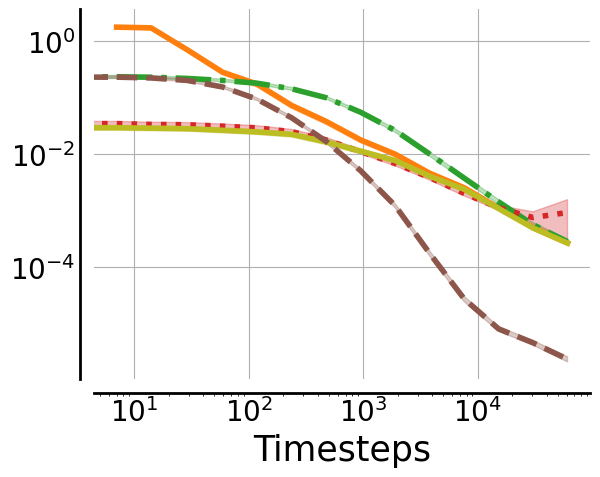

In [11]:
# Figure 3(b)
fig_3b_os_mc_data = load_pickle_data('data/Gridworld/GridWorld_5000_OnPolicySampler1_MonteCarlo')
os_mc_x = fig_3b_os_mc_data['eval_steps']
os_mc_values = np.array(fig_3b_os_mc_data['estimations'][('OnPolicySampler','MonteCarlo')]) 
os_mc_values = (os_mc_values-1)**2

fig_3b_os_opd_mc_data = load_pickle_data('data/Gridworld/GridWorld_5000_OnPolicySamplerComb3_MonteCarlo')
os_opd_mc_x = fig_3b_os_opd_mc_data['eval_steps']
os_opd_mc_values = np.array(fig_3b_os_opd_mc_data['estimations'][('OnPolicySampler', 'MonteCarlo')])
os_opd_mc_values = (os_opd_mc_values-1)**2

fig_3b_bpg_ois_data = load_pickle_data('data/Gridworld/GridWorld_5000_BehaviorPolicyGradientComb3_OrdinaryImportanceSampling')
bpg_ois_x = fig_3b_bpg_ois_data['eval_steps']
bpg_ois_values = np.array(fig_3b_bpg_ois_data['estimations'][('BehaviorPolicyGradient', 'OrdinaryImportanceSampling')])
bpg_ois_values = (bpg_ois_values-1)**2

fig_3b_os_pre_opd_mc_data = load_pickle_data('data/Gridworld/GridWorld_5000_OnPolicySamplerPreComb3_MonteCarlo')
os_opd_wis_mc_x = fig_3b_os_pre_opd_mc_data['eval_steps']
os_opd_wis_mc_values = np.array(fig_3b_os_pre_opd_mc_data['estimations'][('OnPolicySampler', 'MonteCarlo')])
os_opd_wis_mc_values = (os_opd_wis_mc_values-1)**2

fig_3b_ros_mc_data = load_pickle_data('data/Gridworld/GridWorld_5000_RobustOnPolicySamplerComb3_MonteCarlo')
ros_mc_x = fig_3b_ros_mc_data['eval_steps']
ros_mc_values = np.array(fig_3b_ros_mc_data['estimations'][('RobustOnPolicySampler', 'MonteCarlo')])
ros_mc_values = (ros_mc_values-1)**2

fig_3b_plot = {
    'OS-MC': (os_mc_x, os_mc_values, COLORS[1], '-'),
    '(OPD+OS)-MC': (os_opd_mc_x, os_opd_mc_values, COLORS[2], '-.'),
    '(OPD+BPG)-OIS': (bpg_ois_x, bpg_ois_values, COLORS[3], ':'),
    '(OPD+OS)-(WIS+MC)': (os_opd_wis_mc_x, os_opd_wis_mc_values, COLORS[8], '-'),
    '(OPD+ROS)-MC': (ros_mc_x, ros_mc_values, COLORS[5], '--'),
}
draw_mean(fig_3b_plot, save_figure='main_figures/figure3b.pdf', plot_legend=False, show_y_label=False)

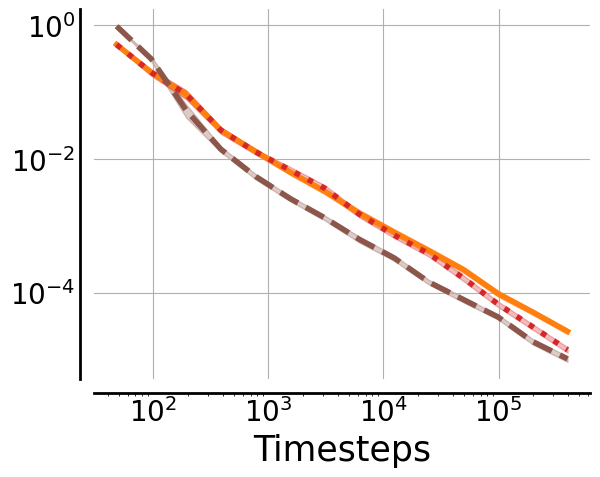

In [12]:
# Figure 2(c)
fig_2c_os_data = load_pickle_data('data/cartpole/CartPole_1000_OnPolicySampler1_MonteCarlo')
os_x = fig_2c_os_data['eval_steps']
values = np.array(fig_2c_os_data['estimations'][('OnPolicySampler','MonteCarlo')]) 
os_values = (values-1)**2

fig_2c_bpg_data = load_pickle_data('data/cartpole/CartPole_1000_BehaviorPolicyGradient1_OrdinaryImportanceSampling')
bpg_x = fig_2c_bpg_data['eval_steps']
values = np.array(fig_2c_bpg_data['estimations'][('BehaviorPolicyGradient', 'OrdinaryImportanceSampling')])
bpg_values = (values-1)**2

fig_2c_ros_data = load_pickle_data('data/cartpole/CartPole_1000_RobustOnPolicySampler2_MonteCarlo')
ros_x = fig_2c_ros_data['eval_steps']
values = np.array(fig_2c_ros_data['estimations'][('RobustOnPolicySampler', 'MonteCarlo')])
ros_values = (values-1)**2

fig_2c_plot = {
    'OS-MC': (os_x, os_values, COLORS[1], '-'),
    'BPG-OIS': (bpg_x, bpg_values, COLORS[3], ':'),
    'ROS-MC': (ros_x, ros_values, COLORS[5], '--'),
}
draw_mean(fig_2c_plot, save_figure='main_figures/figure2c.pdf', plot_legend=False, show_y_label=False)

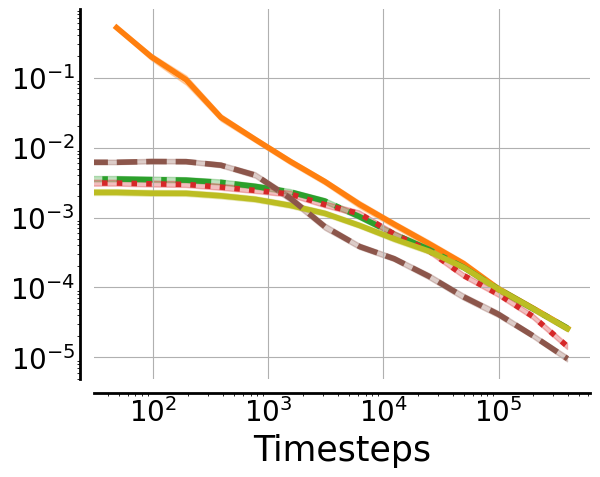

In [13]:
# Figure 3(c)
fig_3c_os_mc_data = load_pickle_data('data/cartpole/CartPole_1000_OnPolicySampler1_MonteCarlo')
os_mc_x = fig_3c_os_mc_data['eval_steps']
os_mc_values = np.array(fig_3c_os_mc_data['estimations'][('OnPolicySampler','MonteCarlo')]) 
os_mc_values = (os_mc_values-1)**2

fig_3c_os_opd_mc_data = load_pickle_data('data/cartpole/CartPole_1000_OnPolicySamplerComb2_MonteCarlo')
os_opd_mc_x = fig_3c_os_opd_mc_data['eval_steps']
os_opd_mc_values = np.array(fig_3c_os_opd_mc_data['estimations'][('OnPolicySampler', 'MonteCarlo')])
os_opd_mc_values = (os_opd_mc_values-1)**2

fig_3c_bpg_ois_data = load_pickle_data('data/cartpole/CartPole_1000_BehaviorPolicyGradientComb2_OrdinaryImportanceSampling')
bpg_ois_x = fig_3c_bpg_ois_data['eval_steps']
bpg_ois_values = np.array(fig_3c_bpg_ois_data['estimations'][('BehaviorPolicyGradient', 'OrdinaryImportanceSampling')])
bpg_ois_values = (bpg_ois_values-1)**2

fig_3c_os_pre_opd_mc_data = load_pickle_data('data/cartpole/CartPole_1000_OnPolicySamplerPreComb2_MonteCarlo')
os_opd_wis_mc_x = fig_3c_os_pre_opd_mc_data['eval_steps']
os_opd_wis_mc_values = np.array(fig_3c_os_pre_opd_mc_data['estimations'][('OnPolicySampler', 'MonteCarlo')])
os_opd_wis_mc_values = (os_opd_wis_mc_values-1)**2

fig_3c_ros_mc_data = load_pickle_data('data/cartpole/CartPole_1000_RobustOnPolicySamplerComb3_MonteCarlo')
ros_mc_x = fig_3c_ros_mc_data['eval_steps']
ros_mc_values = np.array(fig_3c_ros_mc_data['estimations'][('RobustOnPolicySampler', 'MonteCarlo')])
ros_mc_values = (ros_mc_values-1)**2

fig_3c_plot = {
    'OS-MC': (os_mc_x, os_mc_values, COLORS[1], '-'),
    '(OPD+OS)-MC': (os_opd_mc_x, os_opd_mc_values, COLORS[2], '-.'),
    '(OPD+BPG)-OIS': (bpg_ois_x, bpg_ois_values, COLORS[3], ':'),
    '(OPD+OS)-(WIS+MC)': (os_opd_wis_mc_x, os_opd_wis_mc_values, COLORS[8], '-'),
    '(OPD+ROS)-MC': (ros_mc_x, ros_mc_values, COLORS[5], '--'),
}
draw_mean(fig_3c_plot, save_figure='main_figures/figure3c.pdf', plot_legend=False, show_y_label=False)

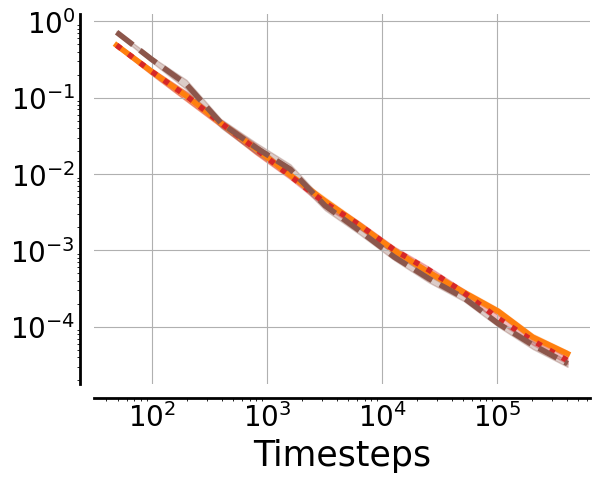

In [14]:
# Figure 2(d)
fig_2d_os_data = load_pickle_data('data/con_cartpole/CartPoleContinuous_3000_OnPolicySampler1_MonteCarlo')
os_x = fig_2d_os_data['eval_steps']
values = np.array(fig_2d_os_data['estimations'][('OnPolicySampler','MonteCarlo')]) 
os_values = (values-1)**2

fig_2d_bpg_data = load_pickle_data('data/con_cartpole/CartPoleContinuous_3000_BehaviorPolicyGradient5_OrdinaryImportanceSampling')
bpg_x = fig_2d_bpg_data['eval_steps']
values = np.array(fig_2d_bpg_data['estimations'][('BehaviorPolicyGradient', 'OrdinaryImportanceSampling')])
bpg_values = (values-1)**2

fig_2d_ros_data = load_pickle_data('data/con_cartpole/CartPoleContinuous_3000_RobustOnPolicySampler2_MonteCarlo')
ros_x = fig_2d_ros_data['eval_steps']
values = np.array(fig_2d_ros_data['estimations'][('RobustOnPolicySampler', 'MonteCarlo')])
ros_values = (values-1)**2

fig_2d_plot = {
    'OS-MC': (os_x, os_values, COLORS[1], '-'),
    'BPG-OIS': (bpg_x, bpg_values, COLORS[3], ':'),
    'ROS-MC': (ros_x, ros_values, COLORS[5], '--'),
}
draw_mean(fig_2d_plot, save_figure='main_figures/figure2d.pdf', plot_legend=False, show_y_label=False)

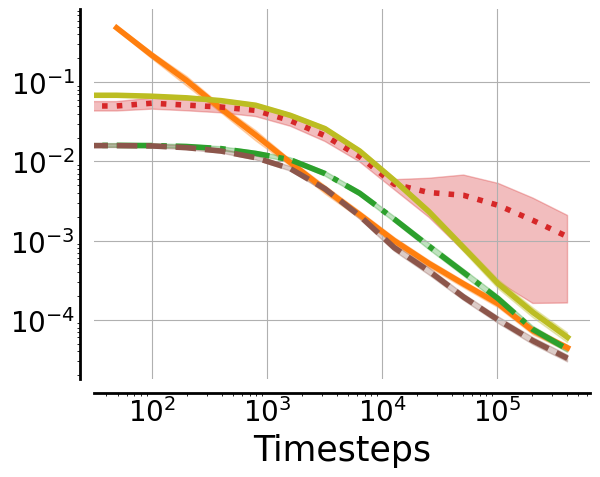

In [15]:
#Figure 3(d)
fig_3d_os_mc_data = load_pickle_data('data/con_cartpole/CartPoleContinuous_3000_OnPolicySampler1_MonteCarlo')
os_mc_x = fig_3d_os_mc_data['eval_steps']
os_mc_values = np.array(fig_3d_os_mc_data['estimations'][('OnPolicySampler','MonteCarlo')]) 
os_mc_values = (os_mc_values-1)**2

fig_3d_os_opd_mc_data = load_pickle_data('data/con_cartpole/CartPoleContinuous_3000_OnPolicySamplerComb3_MonteCarlo')
os_opd_mc_x = fig_3d_os_opd_mc_data['eval_steps']
os_opd_mc_values = np.array(fig_3d_os_opd_mc_data['estimations'][('OnPolicySampler', 'MonteCarlo')])
os_opd_mc_values = (os_opd_mc_values-1)**2

fig_3d_bpg_ois_data = load_pickle_data('data/con_cartpole/CartPoleContinuous_3000_BehaviorPolicyGradientComb3_OrdinaryImportanceSampling')
bpg_ois_x = fig_3d_bpg_ois_data['eval_steps']
bpg_ois_values = np.array(fig_3d_bpg_ois_data['estimations'][('BehaviorPolicyGradient', 'OrdinaryImportanceSampling')])
bpg_ois_values = (bpg_ois_values-1)**2

fig_3d_os_pre_opd_mc_data = load_pickle_data('data/con_cartpole/CartPoleContinuous_3000_OnPolicySamplerPreComb2_MonteCarlo')
os_opd_wis_mc_x = fig_3d_os_pre_opd_mc_data['eval_steps']
os_opd_wis_mc_values = np.array(fig_3d_os_pre_opd_mc_data['estimations'][('OnPolicySampler', 'MonteCarlo')])
os_opd_wis_mc_values = (os_opd_wis_mc_values-1)**2

fig_3d_ros_mc_data = load_pickle_data('data/con_cartpole/CartPoleContinuous_3000_RobustOnPolicySamplerComb3_MonteCarlo')
ros_mc_x = fig_3d_ros_mc_data['eval_steps']
ros_mc_values = np.array(fig_3d_ros_mc_data['estimations'][('RobustOnPolicySampler', 'MonteCarlo')])
ros_mc_values = (ros_mc_values-1)**2

fig_3d_plot = {
    'OS-MC': (os_mc_x, os_mc_values, COLORS[1], '-'),
    '(OPD+OS)-MC': (os_opd_mc_x, os_opd_mc_values, COLORS[2], '-.'),
    '(OPD+BPG)-OIS': (bpg_ois_x, bpg_ois_values, COLORS[3], ':'),
    '(OPD+OS)-(WIS+MC)': (os_opd_wis_mc_x, os_opd_wis_mc_values, COLORS[8], '-'),
    '(OPD+ROS)-MC': (ros_mc_x, ros_mc_values, COLORS[5], '--'),
}
draw_mean(fig_3d_plot, save_figure='main_figures/figure3d.pdf', plot_legend=False, show_y_label=False)

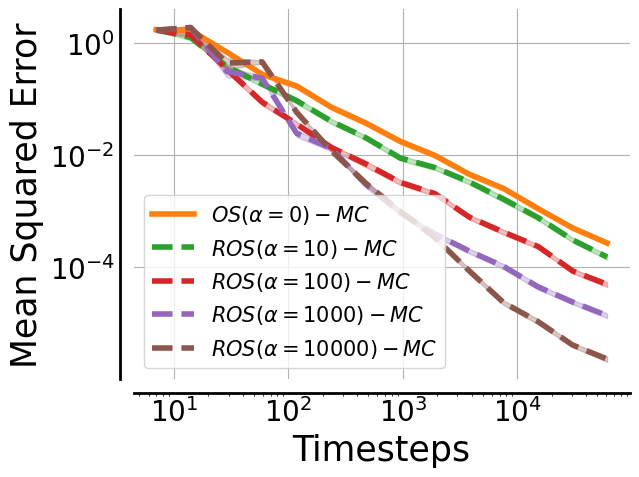

In [16]:
# Figure 4(a)
fig_4a_os_data = load_pickle_data('data/Gridworld/GridWorld_5000_OnPolicySampler1_MonteCarlo')
os_mc_x = fig_4a_os_data['eval_steps']
os_mc_values = np.array(fig_4a_os_data['estimations'][('OnPolicySampler','MonteCarlo')]) 
os_mc_values = (os_mc_values-1)**2

fig_4a_ros_1_data = load_pickle_data('data/Gridworld/GridWorld_5000_RobustOnPolicySampler1_MonteCarlo')
ros_1_x = fig_4a_ros_1_data['eval_steps']
ros_1_values = np.array(fig_4a_ros_1_data['estimations'][('RobustOnPolicySampler', 'MonteCarlo')])
ros_1_values = (ros_1_values-1)**2

fig_4a_ros_2_data = load_pickle_data('data/Gridworld/GridWorld_5000_RobustOnPolicySampler2_MonteCarlo')
ros_2_x = fig_4a_ros_2_data['eval_steps']
ros_2_values = np.array(fig_4a_ros_2_data['estimations'][('RobustOnPolicySampler', 'MonteCarlo')])
ros_2_values = (ros_2_values-1)**2

fig_4a_ros_3_data = load_pickle_data('data/Gridworld/GridWorld_5000_RobustOnPolicySampler3_MonteCarlo')
ros_3_x = fig_4a_ros_3_data['eval_steps']
ros_3_values = np.array(fig_4a_ros_3_data['estimations'][('RobustOnPolicySampler', 'MonteCarlo')])
ros_3_values = (ros_3_values-1)**2

fig_4a_ros_4_data = load_pickle_data('data/Gridworld/GridWorld_5000_RobustOnPolicySampler4_MonteCarlo')
ros_4_x = fig_4a_ros_4_data['eval_steps']
ros_4_values = np.array(fig_4a_ros_4_data['estimations'][('RobustOnPolicySampler', 'MonteCarlo')])
ros_4_values = (ros_4_values-1)**2

fig_4a_plot = {
    r'$OS(\alpha=0)-MC$': (os_mc_x, os_mc_values, COLORS[1], '-'),
    r'$ROS(\alpha=10)-MC$': (ros_1_x, ros_1_values, COLORS[2], '--'),
    r'$ROS(\alpha=100)-MC$': (ros_2_x, ros_2_values, COLORS[3], '--'),
    r'$ROS(\alpha=1000)-MC$': (ros_3_x, ros_3_values, COLORS[4], '--'),
    r'$ROS(\alpha=10000)-MC$': (ros_4_x, ros_4_values, COLORS[5], '--'),
}
draw_mean(fig_4a_plot, save_figure='main_figures/figure4a.pdf', plot_legend=True)

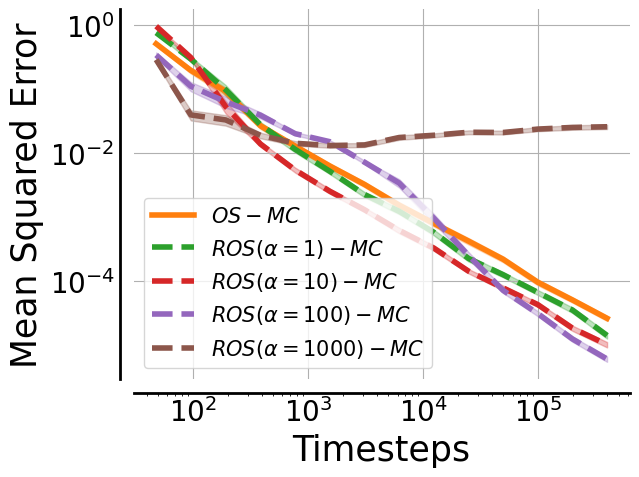

In [17]:
# Figure 4(b)
fig_4b_os_data = load_pickle_data('data/cartpole/CartPole_1000_OnPolicySampler1_MonteCarlo')
os_mc_x = fig_4b_os_data['eval_steps']
os_mc_values = np.array(fig_4b_os_data['estimations'][('OnPolicySampler','MonteCarlo')]) 
os_mc_values = (os_mc_values-1)**2

fig_4b_ros_1_data = load_pickle_data('data/cartpole/CartPole_1000_RobustOnPolicySampler1_MonteCarlo')
ros_1_x = fig_4b_ros_1_data['eval_steps']
ros_1_values = np.array(fig_4b_ros_1_data['estimations'][('RobustOnPolicySampler', 'MonteCarlo')])
ros_1_values = (ros_1_values-1)**2

fig_4b_ros_2_data = load_pickle_data('data/cartpole/CartPole_1000_RobustOnPolicySampler2_MonteCarlo')
ros_2_x = fig_4b_ros_2_data['eval_steps']
ros_2_values = np.array(fig_4b_ros_2_data['estimations'][('RobustOnPolicySampler', 'MonteCarlo')])
ros_2_values = (ros_2_values-1)**2

fig_4b_ros_3_data = load_pickle_data('data/cartpole/CartPole_1000_RobustOnPolicySampler3_MonteCarlo')
ros_3_x = fig_4b_ros_3_data['eval_steps']
ros_3_values = np.array(fig_4b_ros_3_data['estimations'][('RobustOnPolicySampler', 'MonteCarlo')])
ros_3_values = (ros_3_values-1)**2

fig_4b_ros_4_data = load_pickle_data('data/cartpole/CartPole_1000_RobustOnPolicySampler4_MonteCarlo')
ros_4_x = fig_4b_ros_4_data['eval_steps']
ros_4_values = np.array(fig_4b_ros_4_data['estimations'][('RobustOnPolicySampler', 'MonteCarlo')])
ros_4_values = (ros_4_values-1)**2

fig_4b_plot = {
    r'$OS-MC$': (os_mc_x, os_mc_values, COLORS[1], '-'),
    r'$ROS(\alpha=1)-MC$': (ros_1_x, ros_1_values, COLORS[2], '--'),
    r'$ROS(\alpha=10)-MC$': (ros_2_x, ros_2_values, COLORS[3], '--'),
    r'$ROS(\alpha=100)-MC$': (ros_3_x, ros_3_values, COLORS[4], '--'),
    r'$ROS(\alpha=1000)-MC$': (ros_4_x, ros_4_values, COLORS[5], '--'),
}
draw_mean(fig_4b_plot, save_figure='main_figures/figure4b.pdf', plot_legend=True)

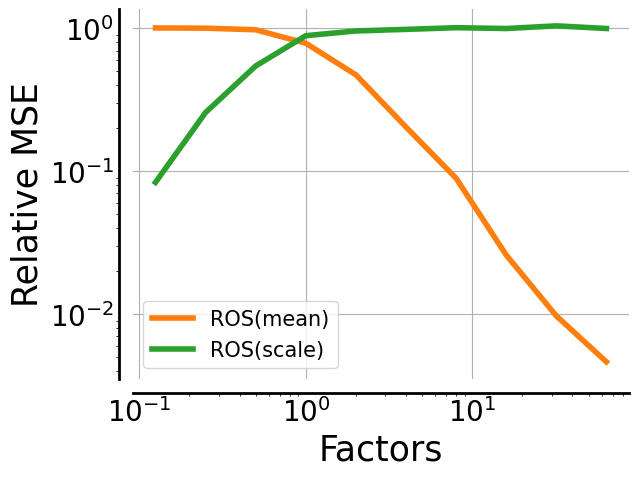

In [18]:
# figure 4(c)
xx = np.array([1/8,1/4,1/2,1,2,4,8,16,32,64])
rate = np.array([1.00838666, 1.00462295, 0.97922283, 0.78809475, 0.47352981,
       0.20403497, 0.08927715, 0.02590137, 0.00970454, 0.00462119])
rate_scale = np.array([0.08356555, 0.25792333, 0.54616262, 0.89000446, 0.96053833,
       0.98539597, 1.01252159, 0.99910949, 1.04297469, 0.99966783])
plt.plot(xx, rate, label='ROS(mean)', color=COLORS[1], linewidth=4)
plt.plot(xx, rate_scale, label='ROS(scale)', color=COLORS[2], linewidth=4)
plt.yscale('log')
plt.xscale('log')
annotate_and_decorate_axis(
    plt.gcf().axes[0], 'Factors', 'Relative MSE', labelsize=25, ticklabelsize=20,
)
plt.legend(fontsize=15)
plt.savefig('main_figures/figure4c.pdf', format='pdf',bbox_inches='tight')

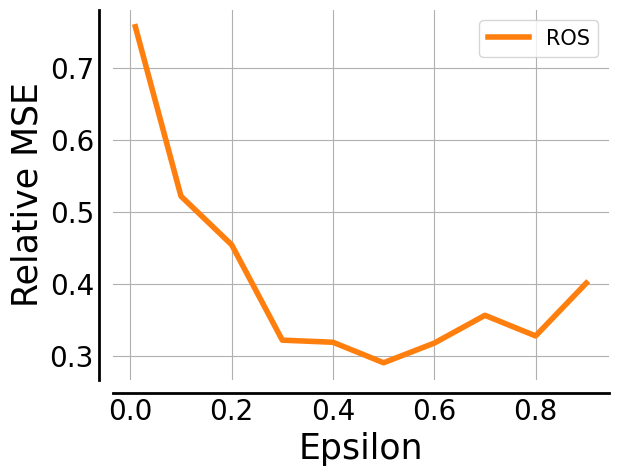

In [19]:
# figure 4(d)
figure4d = torch.load('data/Gridworld_ms/figure4d.pt')
xx = figure4d['xx']
noise = figure4d['noise']
plt.plot(xx, noise.mean(1), alpha = 1, label = 'ROS', color = cycle_colors[1], linewidth = 4)
annotate_and_decorate_axis(
    plt.gcf().axes[0], 'Epsilon', 'Relative MSE', labelsize=25, ticklabelsize=20,
)
plt.legend(fontsize=15)
plt.savefig('main_figures/figure4d.pdf', format='pdf',bbox_inches='tight')